In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Read the data files
jeopardy= pd.read_csv('master_season1-35.tsv', sep='\t')
jeopardy



,round,value,daily_double,category,comments,answer,question,air_date,notes
0,1,100,no,LAKES & RIVERS,-,River mentioned most often in the Bible,the Jordan,1984-09-10,-
1,1,200,no,LAKES & RIVERS,-,Scottish word for lake,loch,1984-09-10,-
2,1,400,no,LAKES & RIVERS,-,American river only 33 miles shorter than the ...,the Missouri,1984-09-10,-
3,1,500,no,LAKES & RIVERS,-,"World's largest lake, nearly 5 times as big as...",the Caspian Sea,1984-09-10,-
4,1,100,no,INVENTIONS,-,Marconi's wonderful wireless,the radio,1984-09-10,-
...,...,...,...,...,...,...,...,...,...
349636,2,400,no,MAKE IT SNAPPY,-,"As well as photosharing on this app, you can w...",Snapchat,2019-07-26,-
349637,2,800,no,MAKE IT SNAPPY,-,"Genus Antirrhinum, these flowers snap closed a...",snapdragons,2019-07-26,-
349638,2,1600,no,MAKE IT SNAPPY,-,This hyphenated tool company owns brands like ...,Snap-On,2019-07-26,-
349639,2,2000,no,MAKE IT SNAPPY,-,"In 2019 meteorologist Daryl Ritchison at NDSU,...",North Dakota State University,2019-07-26,-


In [2]:
#I used this to find the top 5 questions, or in other words to find the most frequent questions
jeopardy['question'].value_counts().head(5)

Australia    327
China        322
France       310
Japan        308
Chicago      306
Name: question, dtype: int64

In [3]:
#I cleaned the data to ensure I only had data from rounds 1, 2, and 3
clean_data = jeopardy.loc[(jeopardy["round"] == 1) | (jeopardy["round"] == 2)| (jeopardy["round"] == 3)]
clean_data

,round,value,daily_double,category,comments,answer,question,air_date,notes
0,1,100,no,LAKES & RIVERS,-,River mentioned most often in the Bible,the Jordan,1984-09-10,-
1,1,200,no,LAKES & RIVERS,-,Scottish word for lake,loch,1984-09-10,-
2,1,400,no,LAKES & RIVERS,-,American river only 33 miles shorter than the ...,the Missouri,1984-09-10,-
3,1,500,no,LAKES & RIVERS,-,"World's largest lake, nearly 5 times as big as...",the Caspian Sea,1984-09-10,-
4,1,100,no,INVENTIONS,-,Marconi's wonderful wireless,the radio,1984-09-10,-
...,...,...,...,...,...,...,...,...,...
349636,2,400,no,MAKE IT SNAPPY,-,"As well as photosharing on this app, you can w...",Snapchat,2019-07-26,-
349637,2,800,no,MAKE IT SNAPPY,-,"Genus Antirrhinum, these flowers snap closed a...",snapdragons,2019-07-26,-
349638,2,1600,no,MAKE IT SNAPPY,-,This hyphenated tool company owns brands like ...,Snap-On,2019-07-26,-
349639,2,2000,no,MAKE IT SNAPPY,-,"In 2019 meteorologist Daryl Ritchison at NDSU,...",North Dakota State University,2019-07-26,-


In [4]:
clean_data ['question'].value_counts().head(5)

Australia    327
China        322
France       310
Japan        308
Chicago      306
Name: question, dtype: int64

In [40]:
#in this step I cleaned the data further to only have data for the top 5 questions. This will help with breaking down my questions. 
question_data = clean_data.loc[(clean_data["question"] == "Australia") | (clean_data["question"] == "China") | (clean_data["question"] == "France") | (clean_data["question"] == "Japan")| (clean_data["question"] == "Chicago")]
question_data

,round,value,daily_double,category,comments,answer,question,air_date,notes
149,1,400,no,GEOGRAPHY,-,Largest country entirely in Europe,France,1984-09-13,-
489,2,400,no,INVENTIONS,-,"Country credited with invention of pasta, porc...",China,1984-09-26,-
645,2,200,no,WORLD WAR I,-,"\""Lafayette, we are here"", referred to America...",France,1984-10-01,-
1823,1,100,no,THE '50s,-,"\""Rashomon,"" Best Foreign Film of '51, was fro...",Japan,1985-03-20,-
2122,1,100,no,OPERA,-,Country where Madame Butterfly flitted,Japan,1985-09-19,-
...,...,...,...,...,...,...,...,...,...
347490,1,400,no,NIXON SAID IT,-,"Of his 1972 trip to this country, Nixon echoed...",China,2019-06-03,-
348031,1,200,no,WHERE IS THAT MOUNT?,(Alex: All you have to do is identify the coun...,Fuji,Japan,2019-06-17,2019 Teen Tournament quarterfinal game 1.
348459,1,800,no,MASKS,-,"\""The Man in the Iron Mask"" was a mysterious u...",France,2019-06-27,2019 Teen Tournament final game 1.
349153,2,400,no,ENCLAVES,-,About 1 mile of this country's Pyrenees territ...,France,2019-07-15,-


In [41]:
#just pulled this data to help understand the distribution, 
#since my first question has to do with distribution of the 
#values for the top 5  questions
question_data["value"].describe()

count     1545.000000
mean       608.223301
std        676.186133
min          5.000000
25%        200.000000
50%        400.000000
75%        800.000000
max      11200.000000
Name: value, dtype: float64

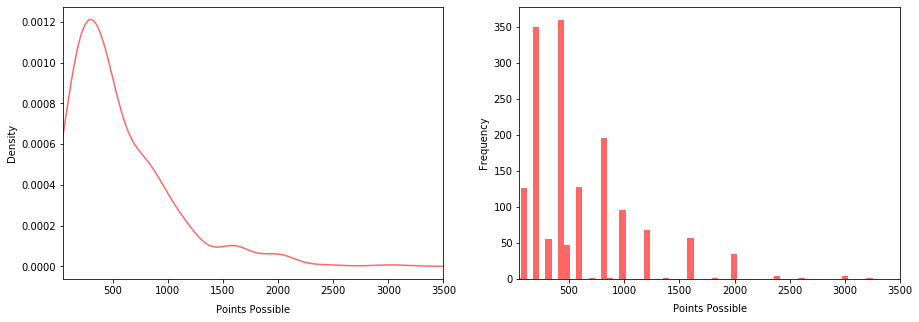

In [45]:
#My First questions: How are the top question's values distributed overall and at what frequency.
#To help see the distribution of values, I am pulling a line graph and a histogram. 
#Knowing that the Min value is 0, mean is about 760 and the 75th percentile is 1000 pts, and that the mix value is 11200.
#We should see the line and histogram scewing to the right with a long tail to the right because of the max values
#Skewed-right data sets have a few large values that drive the mean upward but do not affect where the exact middle of the data is (that is, the median)
fig, axes=plt.subplots(1,2,figsize=(15,5))
ax1=axes[0]
ax2=axes[1]
kdeplot=question_data["value"].plot.kde(ax=ax1,xlim=(0,question_data["value"].max()),alpha=0.6,color='red');
histplot=question_data["value"].plot.hist(ax=ax2,xlim=(0,question_data["value"].max()),alpha=0.6,bins=200,color='red');
ax1.set_xlabel("Value");
ax2.set_xlabel("Value");

kdeplot.set_xlim(50,3500)
kdeplot.set_xlabel("Points Possible",labelpad=9)

histplot.set_xlim(left=50,right=3500)
histplot.set_xlabel("Points Possible",labelpad=8)
ax1.grid(False)
ax2.grid(False)

fig.savefig('JLS_Density_Frequency_output.png')

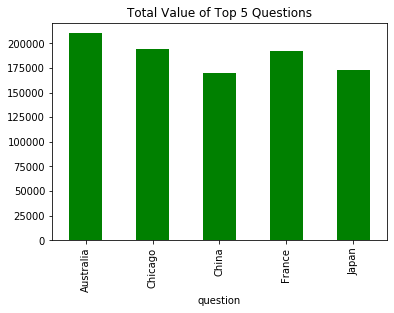

In [95]:
#My second question: Looking at the top 5 values, what questions have the highest 
#value. Finding the mean, median, total value for the top 5 questions helps to 
#understand this. If you want to win jeopardy, it might be helpful to know
#where to spend the most time studying. Although I am only looking at the top 5,
#you can adjust the data a bit and go further to help you know what to study for. 
#First I get the total value. This indicates that Australia as a question that is the most frequent, 
#is also worth the most value overall.
total_value = pd.DataFrame(question_data.groupby(['question'])["value"].sum())
total_value = total_value.rename(columns={"value":"Total Value"})
total_value
total_value.plot(kind="bar", title="Total Value of Top 5 Questions", legend=None, color="green")
fig.savefig('JLS_Total Value_output.png')

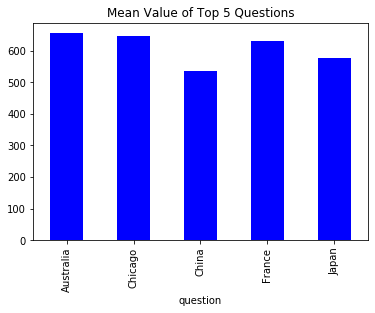

In [96]:
#calculation of mean
#You can see that Australia continues to be the most valuable, however the 
#mean of Chicago and France seem to suggest that they average out to be similar 
#value.
mean_value = pd.DataFrame(question_data.groupby(['question'])["value"].mean())
mean_value = mean_value.rename(columns={"value":"Mean Value"})
mean_value
mean_value.plot(kind="bar", title="Mean Value of Top 5 Questions", color="blue", legend=None)
fig.savefig('JLS_Mean Value_output.png')

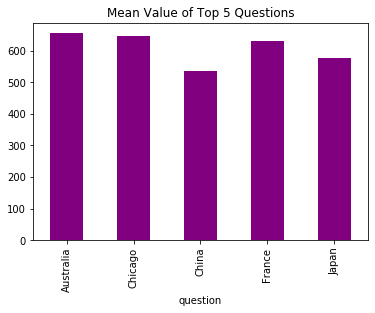

In [98]:
#calculation of median
#This again shows the value of the top 5 are trending to be similar value overall. 
#If we were to expand our data to include the top 100 questions, this would 
#help someone really understand where to consentate their study time. 
median_value = pd.DataFrame(question_data.groupby(['question'])["value"].median())
median_value = median_value .rename(columns={"value":"Median Value"})
median_value 
mean_value.plot(kind="bar", title="Mean Value of Top 5 Questions", color="purple", legend=None)
fig.savefig('JLS_Median Value_output.png')